## **Import Libraries**

In [0]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import KFold
from sklearn.svm import SVR
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Checking if connected to GPU
"""import tensorflow as tf
device_name = tf.test.gpu_device_name()
if tf.test.is_gpu_available:
  print('Found GPU at: {}'.format(device_name))
else:
  raise SystemError('GPU device not found')
  """

"import tensorflow as tf\ndevice_name = tf.test.gpu_device_name()\nif tf.test.is_gpu_available:\n  print('Found GPU at: {}'.format(device_name))\nelse:\n  raise SystemError('GPU device not found')\n  "

## **Fetching Data**

In [0]:
data = pd.read_excel('output8.xlsx')
data1 = pd.read_csv('Melbourne_housing_FULL.csv')

## **Data Exploration**

In [4]:
data.shape

(34857, 21)

In [5]:
data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [6]:
# Check Data Types
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34857 entries, 0 to 34856
Data columns (total 21 columns):
Suburb           34857 non-null object
Address          34857 non-null object
Rooms            34857 non-null int64
Type             34857 non-null object
Price            27247 non-null float64
Method           34857 non-null object
SellerG          34857 non-null object
Date             34857 non-null object
Distance         34856 non-null float64
Postcode         34856 non-null float64
Bedroom2         26640 non-null float64
Bathroom         26631 non-null float64
Car              26129 non-null float64
Landsize         23047 non-null float64
BuildingArea     13742 non-null float64
YearBuilt        15551 non-null float64
CouncilArea      34854 non-null object
Lattitude        34339 non-null float64
Longtitude       34339 non-null float64
Regionname       34854 non-null object
Propertycount    34854 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 5.9+ M

In [7]:
# Check Numeric Values
data.describe().transpose()
## This shows that Postal code is being taken as a numeric value, but it should be categorical. 

count          mean            std           min  \
Rooms          34857.0  3.031012e+00       0.969933      1.000000   
Price          27247.0  1.050173e+06  641467.130105  85000.000000   
Distance       34856.0  1.118493e+01       6.788892      0.000000   
Postcode       34856.0  3.116063e+03     109.023903   3000.000000   
Bedroom2       26640.0  3.084647e+00       0.980690      0.000000   
Bathroom       26631.0  1.624798e+00       0.724212      0.000000   
Car            26129.0  1.728845e+00       1.010771      0.000000   
Landsize       23047.0  5.935990e+02    3398.841946      0.000000   
BuildingArea   13742.0  1.602564e+02     401.267060      0.000000   
YearBuilt      15551.0  1.965290e+03      37.328178   1196.000000   
Lattitude      34339.0 -3.740897e+01       5.657256    -46.435754   
Longtitude     34339.0  1.439461e+02      15.073354   -122.338634   
Propertycount  34854.0  7.572888e+03    4428.090313     83.000000   

                         25%           50%           75%           max  
Rooms               2.000000       3.00000  4.000000e+00  1.600000e+01  
Price          635000.000000  870000.00000  1.295000e+06  1.120000e+07  
Distance            6.400000      10.30000  1.400000e+01  4.810000e+01  
Postcode         3051.000000    3103.00000  3.156000e+03  3.978000e+03  
Bedroom2            2.000000       3.00000  4.000000e+00  3.000000e+01  
Bathroom            1.000000       2.00000  2.000000e+00  1.200000e+01  
Car                 1.000000       2.00000  2.000000e+00  2.600000e+01  
Landsize          224.000000     521.00000  6.700000e+02  4.330140e+05  
BuildingArea      102.000000     136.00000  1.880000e+02  4.451500e+04  
YearBuilt        1940.000000    1970.00000  2.000000e+03  2.106000e+03  
Lattitude         -37.863300     -37.80742 -3.775243e+01  5.378383e+01  
Longtitude        144.933691     145.00979  1.450727e+02  1.784265e+02  
Propertycount    4385.000000    6763.00000  1.041200e+04  2.165000e+04

## **Handling missing values**

In [8]:
#Look for missing/null values
data.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude          518
Longtitude         518
Regionname           3
Propertycount        3
dtype: int64

### **Price**

In [0]:
# Remove any rows which have price as null because that is our target value.
data = data.dropna(axis=0, subset=['Price'])
data = data.reset_index()

### **Longitude and Lattitude**

In [0]:
# if we couldnt find the Longtitude and Lattitude using the geopy API, then put the median.
data['Lattitude']= data['Lattitude'].fillna(data['Lattitude'].median())
data['Longtitude']= data['Longtitude'].fillna(data['Longtitude'].median())

###**PostCode**


In [11]:
# we can use geooy to find post code
geolocator = Nominatim(user_agent="Melbourne Housing Prediction")
location = geolocator.geocode("Brian St Fawkner Lot")
if location is not None:
  print(location.address)    

Brian Street, Fawkner, City of Moreland, Victoria, 3060, Australia


In [0]:
data['Postcode']= data['Postcode'].fillna(3060)

### **Others**

In [0]:
# Replacing data with median
data['YearBuilt']= data['YearBuilt'].fillna(data['YearBuilt'].median())

# Replacing data with mean
# only 1 row has missing distance, can replace with mean value.
data['Distance']= data['Distance'].fillna(data['Distance'].mean())

# Replacing 
data['Bathroom']= data['Bathroom'].fillna(data['Bathroom'].mean())
data['Car']= data['Car'].fillna(data['Car'].mean())
data['Landsize']= data['Landsize'].fillna(data['Landsize'].mean()) 
data['BuildingArea']= data['BuildingArea'].fillna(data['BuildingArea'].mean())

In [14]:
#Look for missing/null values
data.isnull().sum()

index               0
Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2         6441
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
YearBuilt           0
CouncilArea         3
Lattitude           0
Longtitude          0
Regionname          3
Propertycount       3
dtype: int64

In [0]:
# Replacing categorical data with mode
data['CouncilArea']= data['CouncilArea'].fillna(data['CouncilArea'].mode()[0])
data['Regionname']= data['Regionname'].fillna(data['Regionname'].mode()[0])
data['Propertycount']= data['Propertycount'].fillna(data['Propertycount'].mode()[0])


### **Bedroom2** 

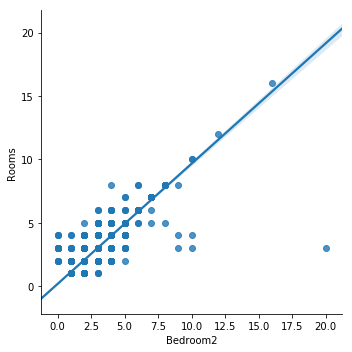

In [16]:
sns.lmplot(data= data, x='Bedroom2', y='Rooms')

In [0]:
# remove bedroom2, it is same as room. 
data= data.drop(['Bedroom2'], axis=1)

In [0]:
data['Bathroom'] = pd.to_numeric(data['Bathroom']).round(0).astype(int)
data['Car'] = pd.to_numeric(data['Car']).round(0).astype(int)

In [19]:
data.shape

(27247, 21)

## **Outlier Detection and Removal**

### Building Area

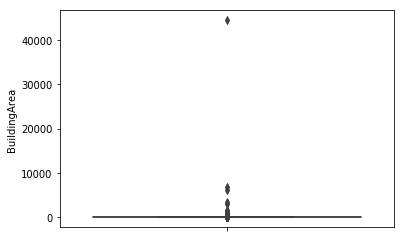

In [20]:
sns.boxplot(data = data, y = 'BuildingArea')

In [21]:
data['BuildingArea'].loc[data.BuildingArea<1].count()

61

In [22]:
data.loc[data.BuildingArea<1].head()

index           Suburb            Address  Rooms Type      Price  \
5547    7211  North Melbourne       19 Shands La      2    t   841000.0   
15424  19775     Balwyn North      14 Wanbrow Av      5    h  1950000.0   
15474  19840         Bundoora      22 Moreton Cr      3    h   814000.0   
15782  20223    Roxburgh Park     16 Sandover Dr      4    h   570000.0   
15811  20262        Thornbury  19/337 Station St      3    t   900000.0   

      Method SellerG       Date  Distance      ...       Bathroom  Car  \
5547       S  Jellis  4/03/2017       2.3      ...              1    1   
15424      S      RT  3/09/2017       9.7      ...              3    2   
15474      S   Barry  3/09/2017      12.1      ...              1    2   
15782      S   Raine  3/09/2017      20.6      ...              2    2   
15811     VB  Jellis  3/09/2017       7.0      ...              2    2   

       Landsize  BuildingArea  YearBuilt              CouncilArea Lattitude  \
5547      215.0           0.0     2000.0   Melbourne City Council -37.79530   
15424     743.0           0.0     1949.0  Boroondara City Council -37.80235   
15474     542.0           0.0     1970.0     Banyule City Council -37.70861   
15782     504.0           0.0     2000.0        Hume City Council -37.61419   
15811     120.0           0.0     2000.0     Darebin City Council -37.76343   

       Longtitude             Regionname Propertycount  
5547    144.94370  Northern Metropolitan        6821.0  
15424   145.09311  Southern Metropolitan        7809.0  
15474   145.05691  Northern Metropolitan       10175.0  
15782   144.93448  Northern Metropolitan        5833.0  
15811   145.02096  Northern Metropolitan        8870.0  

[5 rows x 21 columns]

In [23]:
#use the unary operator ~ to delete the rows
data = data[~(data['BuildingArea'] < 1)]  
#check the deletion
data['BuildingArea'].loc[data.BuildingArea<1].count()

0

In [24]:
data.loc[data.BuildingArea>40000].transpose()


17657
index                                 22632
Suburb                         New Gisborne
Address                      71 Hamilton Rd
Rooms                                     5
Type                                      h
Price                             1.355e+06
Method                                    S
SellerG                               Raine
Date                             23/09/2017
Distance                               48.1
Postcode                               3438
Bathroom                                  3
Car                                       5
Landsize                              44500
BuildingArea                          44515
YearBuilt                              1970
CouncilArea    Macedon Ranges Shire Council
Lattitude                          -37.4539
Longtitude                          144.589
Regionname                Northern Victoria
Propertycount                           849

In [25]:
#use the unary operator ~ to delete the rows
data = data[~(data.BuildingArea>40000)]  
#check the deletion
data['BuildingArea'].loc[data.BuildingArea>40000].count()


0

### **LandSize**

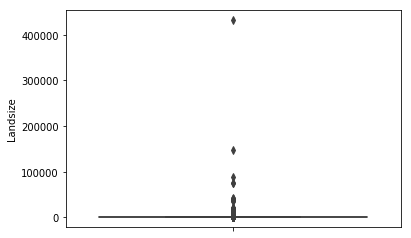

In [26]:
sns.boxplot(data = data, y = 'Landsize')

In [27]:
data['Landsize'].loc[data.Landsize<1].count()

1942

In [28]:
#use the unary operator ~ to delete the rows
data = data[~(data['Landsize'] < 1)]  
#check the deletion
data['Landsize'].loc[data.Landsize<1].count()

0

### **Bathroom**

In [29]:
data['Bathroom'].value_counts()

2    14466
1     9020
3     1505
4      175
5       46
0       16
6       10
8        3
9        1
7        1
Name: Bathroom, dtype: int64

In [30]:
data.loc[data.Bathroom>7].head(10)

index      Suburb         Address  Rooms Type      Price Method  \
6345    8251     Preston   421 Murray Rd      4    h   760000.0     PI   
13579  17472  Camberwell  1088 Toorak Rd      8    h  2200000.0     PI   
20141  25717     Burwood     79 Elgar Rd     10    h  2315000.0     SP   
20530  26210     Mitcham  20 Harrison St     16    h  5000000.0      S   

      SellerG        Date  Distance      ...       Bathroom  Car     Landsize  \
6345    Barry  22/05/2016       8.8      ...              8    7  1254.000000   
13579    Ross   8/07/2017       7.7      ...              8    4   650.000000   
20141  Buxton  28/10/2017      10.4      ...              9    2   612.000000   
20530  Buxton  28/10/2017      17.2      ...              8    8   593.488933   

       BuildingArea  YearBuilt              CouncilArea Lattitude  Longtitude  \
6345     280.000000     1928.0     Darebin City Council -37.73670   144.98950   
13579    156.834586     1970.0  Boroondara City Council -37.84812   145.07414   
20141    466.000000     2015.0      Monash City Council -37.84461   145.10968   
20530    156.834586     1970.0  Whitehorse City Council -37.81405   145.19891   

                  Regionname Propertycount  
6345   Northern Metropolitan       14577.0  
13579  Southern Metropolitan        8920.0  
20141  Southern Metropolitan        5678.0  
20530   Eastern Metropolitan        6871.0  

[4 rows x 21 columns]

### **YearBuilt**

In [31]:
data['YearBuilt'].loc[data.YearBuilt>2019]

Series([], Name: YearBuilt, dtype: float64)

In [0]:
#replace 2106 with 2016
data['YearBuilt'].replace([2106], [2016], inplace=True)

In [33]:
data['YearBuilt'].loc[data.YearBuilt<1200]


12754    1196.0
Name: YearBuilt, dtype: float64

In [34]:
data.loc[12754]

index                           16424
Suburb                 Mount Waverley
Address                5 Armstrong St
Rooms                               3
Type                                h
Price                         1.2e+06
Method                             VB
SellerG                       McGrath
Date                       24/06/2017
Distance                         14.2
Postcode                         3149
Bathroom                            1
Car                                 4
Landsize                          807
BuildingArea                      117
YearBuilt                        1196
CouncilArea       Monash City Council
Lattitude                    -37.8679
Longtitude                    145.121
Regionname       Eastern Metropolitan
Propertycount                   13366
Name: 12754, dtype: object

In [35]:
data.shape

(25243, 21)

## **Feature Engineering**

### **Get Age from YearBuilt**

In [0]:
# Adding age
data['Age'] = 2019 - data['YearBuilt']

### **Get season from Date**

In [0]:
data['Date_new'] = pd.to_datetime(data['Date'])

In [0]:
# calculate day of year
data['doy'] = data['Date_new'].dt.dayofyear
# Create year
data['Year'] = data['Date_new'].dt.year

#to divide by season it's better to use the day of the year instead of the months
autumn = range(70, 150)
winter = range(150, 240)
spring = range(240, 330)
# summer = everything else

daje = []
for i in data['doy']:
    if i in spring:
        season = 'spring'
    elif i in winter:
        season = 'winter'
    elif i in autumn:
        season = 'autumn'
    else:
        season = 'summer'
    daje.append(season)   

#add the resulting column to the dataframe (after transforming it as a Series)
data['season']= pd.Series(daje)

### **Feature Selection**

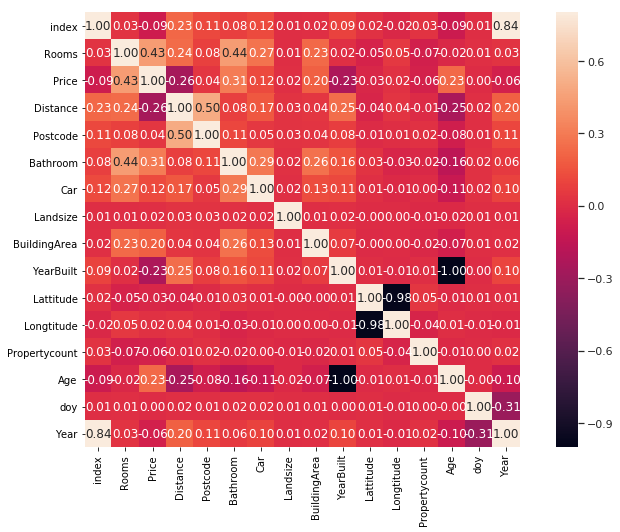

In [39]:
# correlation matrix
corrmat = data.corr()
f, ax = plt.subplots(figsize=(13, 8))
sns.set(font_scale=1)
sns.heatmap(corrmat,annot=True, square=True, fmt='.2f', vmax=.8);

### **Drop useless columns**

In [0]:
## We have Longitude and Latitude, which are nothing but Suburb and Address converted to numeric. 
# So We can drop Suburb and Address.
# We have fetched age from YearBuilt, so that is also not required now.
data =data.drop(columns=['Suburb', 'Address', 'Date','Method','SellerG','CouncilArea','Postcode','YearBuilt',
                         'Date_new','doy'])

### **Type to Dummy**

In [0]:
dummy = pd.get_dummies(data['Type'])
data = pd.concat([data, dummy], axis=1)

dummy = pd.get_dummies(data['Regionname'])
data = pd.concat([data, dummy], axis=1)


dummy = pd.get_dummies(data['season'])
data = pd.concat([data, dummy], axis=1)

In [0]:
data =data.drop(columns=['Type', 'Regionname', 'season'])

In [43]:
# dropping price here because it is target value
# dropping Lattitude and Longtitude because they have negative values and SelectKBest does not allow negative values.
X = data[data.columns.drop(['Price','Lattitude', 'Longtitude'])]
Y = data['Price']

selector = SelectKBest(chi2, k=10)
selector.fit(X, Y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)]) #top 3 columns


Index(['index', 'Distance', 'Landsize', 'BuildingArea', 'Propertycount', 'Age',
       'u', 'Northern Victoria', 'Southern Metropolitan', 'Western Victoria'],
      dtype='object')


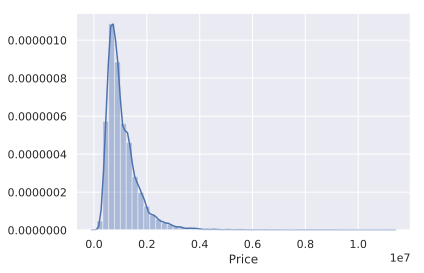

In [44]:
%config InlineBackend.figure_format = 'svg'
#Plot the SalePrice of each instance
sns.distplot(data['Price'])

In [45]:
#skewness and kurtosis
print("Skewness: %f" % data['Price'].skew())
print("Kurtosis: %f" % data['Price'].kurt())

Skewness: 2.590225
Kurtosis: 13.087569


In [46]:
data.plot(kind="scatter", x="Longtitude", y="Lattitude", alpha=0.4,
c=data.Price, cmap=plt.get_cmap("jet"), label= 'Price by location', figsize=(10,7)) 
plt.ylabel("Latitude", fontsize=14)

plt.legend(fontsize=14)

## **Min max scaling**

In [0]:
features = ['Rooms',  'Distance', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'Lattitude', 'Longtitude', 'Propertycount', 'Age',
       'Year', 'h', 't', 'u', 'Eastern Metropolitan', 'Eastern Victoria',
       'Northern Metropolitan', 'Northern Victoria',
       'South-Eastern Metropolitan', 'Southern Metropolitan',
       'Western Metropolitan', 'Western Victoria', 'autumn', 'spring', 'summer',
       'winter','Price']

normalized_data = data[features]

# Normalization using Min-Max Scaler
scaler = MinMaxScaler()
scaler.fit(normalized_data)
normalized_data = pd.DataFrame(scaler.transform(normalized_data), index=normalized_data.index, columns = normalized_data.columns)


In [0]:
normalized_data.to_excel("processedData.xlsx")

In [0]:
X = normalized_data[normalized_data.columns.drop(['Price'])]
y = normalized_data['Price']

In [50]:
X.describe().transpose()


count      mean       std  min       25%  \
Rooms                       25243.0  0.137997  0.061713  0.0  0.066667   
Distance                    25243.0  0.242224  0.141880  0.0  0.143451   
Bathroom                    25243.0  0.191459  0.070319  0.0  0.111111   
Car                         25243.0  0.102081  0.048228  0.0  0.055556   
Landsize                    25243.0  0.001470  0.007285  0.0  0.001058   
BuildingArea                25243.0  0.023196  0.012091  0.0  0.022951   
Lattitude                   25243.0  0.090505  0.058918  0.0  0.085556   
Longtitude                  25243.0  0.884933  0.053189  0.0  0.888609   
Propertycount               25243.0  0.344628  0.209386  0.0  0.191682   
Age                         25243.0  0.062048  0.029838  0.0  0.059538   
Year                        25243.0  0.438003  0.315838  0.0  0.000000   
h                           25243.0  0.723012  0.447519  0.0  0.000000   
t                           25243.0  0.107832  0.310174  0.0  0.000000   
u                           25243.0  0.169156  0.374897  0.0  0.000000   
Eastern Metropolitan        25243.0  0.127679  0.333739  0.0  0.000000   
Eastern Victoria            25243.0  0.006497  0.080342  0.0  0.000000   
Northern Metropolitan       25243.0  0.287169  0.452450  0.0  0.000000   
Northern Victoria           25243.0  0.006536  0.080585  0.0  0.000000   
South-Eastern Metropolitan  25243.0  0.052569  0.223176  0.0  0.000000   
Southern Metropolitan       25243.0  0.295924  0.456466  0.0  0.000000   
Western Metropolitan        25243.0  0.219823  0.414135  0.0  0.000000   
Western Victoria            25243.0  0.003803  0.061553  0.0  0.000000   
autumn                      25243.0  0.163491  0.369820  0.0  0.000000   
spring                      25243.0  0.325793  0.468680  0.0  0.000000   
summer                      25243.0  0.182150  0.385975  0.0  0.000000   
winter                      25243.0  0.249376  0.432660  0.0  0.000000   

                                 50%       75%  max  
Rooms                       0.133333  0.200000  1.0  
Distance                    0.222453  0.297297  1.0  
Bathroom                    0.222222  0.222222  1.0  
Car                         0.111111  0.111111  1.0  
Landsize                    0.001368  0.001394  1.0  
BuildingArea                0.022951  0.022951  1.0  
Lattitude                   0.086185  0.086729  1.0  
Longtitude                  0.888882  0.889103  1.0  
Propertycount               0.299532  0.475170  1.0  
Age                         0.059538  0.059538  1.0  
Year                        0.500000  0.500000  1.0  
h                           1.000000  1.000000  1.0  
t                           0.000000  0.000000  1.0  
u                           0.000000  0.000000  1.0  
Eastern Metropolitan        0.000000  0.000000  1.0  
Eastern Victoria            0.000000  0.000000  1.0  
Northern Metropolitan       0.000000  1.000000  1.0  
Northern Victoria           0.000000  0.000000  1.0  
South-Eastern Metropolitan  0.000000  0.000000  1.0  
Southern Metropolitan       0.000000  1.000000  1.0  
Western Metropolitan        0.000000  0.000000  1.0  
Western Victoria            0.000000  0.000000  1.0  
autumn                      0.000000  0.000000  1.0  
spring                      0.000000  1.000000  1.0  
summer                      0.000000  0.000000  1.0  
winter                      0.000000  0.000000  1.0

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## **Utility functions** 

In [0]:
def metrices(y_test, y_predicted, model, X_test):
  # calculate the spearman's correlation between two variables
  from numpy.random import rand
  from numpy.random import seed
  from scipy.stats import spearmanr
  # seed random number generator
  seed(1)
  
  # calculate spearman's correlation
  coef, p = spearmanr(y_test, y_predicted)
  
  print("Mean Absolute Error:", mean_absolute_error(y_test, y_predicted))
  print('Mean Square Error:', mean_squared_error(y_test, y_predicted))
  print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test, y_predicted)))
  """ RuntimeWarning: Degrees of freedom <= 0 for slice
  occurs when you use the wrong shape, e.g.:
  """
  print('Pearson Correlation coefficient:',np.corrcoef(y_test.T, y_predicted.T)[0, 1])
  print('Spearmans correlation coefficient:',  coef)
  print('Model R^2 score:', model.score(X_test, y_test))

In [0]:
def runModel(model):
  model.fit(X_train, y_train)
  y_predicted = model.predict(X_test)

  metrices(y_test, y_predicted, model, X_test)

In [0]:
def findBestParams(model):
  from sklearn.metrics import r2_score, mean_squared_error
  from sklearn.model_selection import  GridSearchCV

  params = {
      'n_estimators': [10, 30, 100, 300, 400],
      'max_depth': [3, 5, 7,10,15,20]
  }
  grid_search = GridSearchCV(model, param_grid=params, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
  grid_search.fit(X_train, y_train)
  preds = grid_search.predict(X_test)
  # plt.figure()
  # plt.plot(list(params.values())[0],(-1*grid_search.cv_results_['mean_test_score'])**0.5)
  # plt.xlabel('Number of trees')
  # plt.ylabel('3-fold CV RMSE')
  print("Best params found: {}".format(grid_search.best_params_))
  print("RMSE score: {}".format(mean_squared_error(y_test, preds) ** 0.5))

## **1. Linear Regression** 

In [55]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_predicted = linear_model.predict(X_test)

metrices(y_test, y_predicted, linear_model, X_test)

Mean Absolute Error: 0.025327488050536785
Mean Square Error: 0.0014868555282350478
Root Mean Square Error: 0.038559765666236194
Pearson Correlation coefficient: 0.7535584088896295
Spearmans correlation coefficient: 0.8113665796795602
Model R^2 score: 0.5676602926327902


## **1. Linear Regression-K fold** 

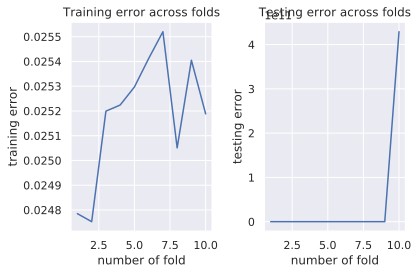

In [56]:
from sklearn.model_selection import validation_curve

kf = KFold(n_splits=10, random_state=None)
list_training_error = []
list_testing_error1 = []

for train_index, test_index in kf.split(X,y):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index] 
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]
  
  
  model = LinearRegression()
  model.fit(X_train, y_train)
  y_train_data_pred = model.predict(X_train)
  y_test_data_pred = model.predict(X_test) 

  fold_training_error = mean_absolute_error(y_train, y_train_data_pred)        
  fold_testing_error = mean_absolute_error(y_test, y_test_data_pred)
  list_training_error.append(fold_training_error)
  list_testing_error1.append(fold_testing_error)

plt.subplot(1,2,1)
plt.plot(range(1, kf.get_n_splits() + 1), np.array(list_training_error).ravel())
plt.xlabel('number of fold')
plt.ylabel('training error')
plt.title('Training error across folds')
plt.tight_layout()

plt.subplot(1,2,2)
plt.plot(range(1, kf.get_n_splits() + 1), np.array(list_testing_error1).ravel())
plt.xlabel('number of fold')
plt.ylabel('testing error')
plt.title('Testing error across folds')
plt.tight_layout()
plt.show()

## **2. Decision Tree Regressor**


In [57]:
decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(X_train, y_train)
y_predicted = decision_tree_model.predict(X_test)

metrices(y_test, y_predicted, decision_tree_model, X_test)

Mean Absolute Error: 0.020069640237986613
Mean Square Error: 0.0012037798243645724
Root Mean Square Error: 0.03469553032257285
Pearson Correlation coefficient: 0.8124476555337768
Spearmans correlation coefficient: 0.8703840462352296
Model R^2 score: 0.6345289919623109


## **2. Decision Tree Regressor-K fold**


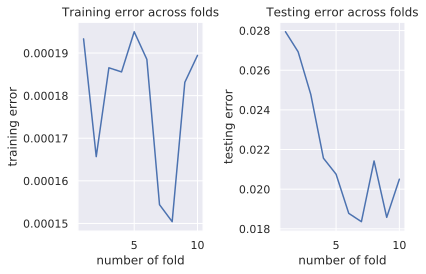

In [58]:
from sklearn.model_selection import validation_curve

kf = KFold(n_splits=10, random_state=None)
list_training_error = []
list_testing_error2 = []

for train_index, test_index in kf.split(X,y):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index] 
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]
  
  
  model = DecisionTreeRegressor()
  model.fit(X_train, y_train)
  y_train_data_pred = model.predict(X_train)
  y_test_data_pred = model.predict(X_test) 

  fold_training_error = mean_absolute_error(y_train, y_train_data_pred)        
  fold_testing_error = mean_absolute_error(y_test, y_test_data_pred)
  list_training_error.append(fold_training_error)
  list_testing_error2.append(fold_testing_error)

plt.subplot(1,2,1)
plt.plot(range(1, kf.get_n_splits() + 1), np.array(list_training_error).ravel())
plt.xlabel('number of fold')
plt.ylabel('training error')
plt.title('Training error across folds')
plt.tight_layout()

plt.subplot(1,2,2)
plt.plot(range(1, kf.get_n_splits() + 1), np.array(list_testing_error2).ravel())
plt.xlabel('number of fold')
plt.ylabel('testing error')
plt.title('Testing error across folds')
plt.tight_layout()
plt.show()

## **3. Nearest Neighbors**

In [59]:
from sklearn import neighbors

n_neighbors = 5

knn = neighbors.KNeighborsRegressor(n_neighbors, weights='distance')
knn.fit(X_train, y_train)
y_predicted = knn.predict(X_test)

metrices(y_test, y_predicted, knn, X_test)


Mean Absolute Error: 0.021354660191957756
Mean Square Error: 0.0012908740685049012
Root Mean Square Error: 0.03592873597143241
Pearson Correlation coefficient: 0.7897853066013286
Spearmans correlation coefficient: 0.8227623947146895
Model R^2 score: 0.6080869295884472


## **3. Nearest Neighbors-K fold**

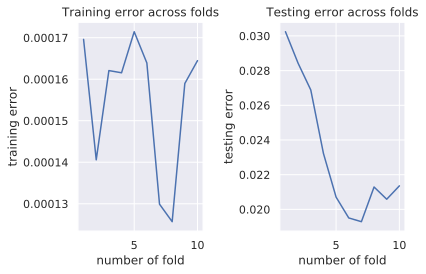

In [60]:
from sklearn.model_selection import validation_curve

kf = KFold(n_splits=10, random_state=None)
list_training_error = []
list_testing_error3 = []

for train_index, test_index in kf.split(X,y):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index] 
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]
  
  
  model = neighbors.KNeighborsRegressor(n_neighbors, weights='distance')
  model.fit(X_train, y_train)
  y_train_data_pred = model.predict(X_train)
  y_test_data_pred = model.predict(X_test) 

  fold_training_error = mean_absolute_error(y_train, y_train_data_pred)        
  fold_testing_error = mean_absolute_error(y_test, y_test_data_pred)
  list_training_error.append(fold_training_error)
  list_testing_error3.append(fold_testing_error)

plt.subplot(1,2,1)
plt.plot(range(1, kf.get_n_splits() + 1), np.array(list_training_error).ravel())
plt.xlabel('number of fold')
plt.ylabel('training error')
plt.title('Training error across folds')
plt.tight_layout()

plt.subplot(1,2,2)
plt.plot(range(1, kf.get_n_splits() + 1), np.array(list_testing_error3).ravel())
plt.xlabel('number of fold')
plt.ylabel('testing error')
plt.title('Testing error across folds')
plt.tight_layout()
plt.show()

## **4. BaggingRegressor**

In [61]:
from sklearn.ensemble import BaggingRegressor

bagging_model = BaggingRegressor(DecisionTreeRegressor(random_state=1))
bagging_model.fit(X_train, y_train)
y_predicted = bagging_model.predict(X_test)

metrices(y_test, y_predicted, bagging_model, X_test)

Mean Absolute Error: 0.014298377180903724
Mean Square Error: 0.0005984230022098018
Root Mean Square Error: 0.024462685915692124
Pearson Correlation coefficient: 0.9049589412868101
Spearmans correlation coefficient: 0.9191281868323379
Model R^2 score: 0.8183170597945493


## **4. BaggingRegressor-K fold**

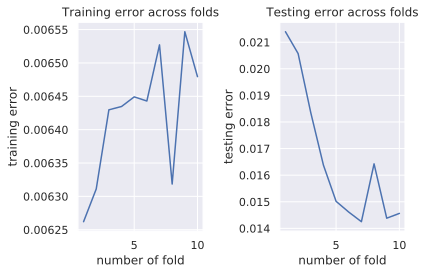

In [62]:
from sklearn.model_selection import validation_curve

kf = KFold(n_splits=10, random_state=None)
list_training_error = []
list_testing_error4 = []

for train_index, test_index in kf.split(X,y):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index] 
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]
  
  
  model = BaggingRegressor(DecisionTreeRegressor(random_state=1))
  model.fit(X_train, y_train)
  y_train_data_pred = model.predict(X_train)
  y_test_data_pred = model.predict(X_test) 

  fold_training_error = mean_absolute_error(y_train, y_train_data_pred)        
  fold_testing_error = mean_absolute_error(y_test, y_test_data_pred)
  list_training_error.append(fold_training_error)
  list_testing_error4.append(fold_testing_error)

plt.subplot(1,2,1)
plt.plot(range(1, kf.get_n_splits() + 1), np.array(list_training_error).ravel())
plt.xlabel('number of fold')
plt.ylabel('training error')
plt.title('Training error across folds')
plt.tight_layout()

plt.subplot(1,2,2)
plt.plot(range(1, kf.get_n_splits() + 1), np.array(list_testing_error4).ravel())
plt.xlabel('number of fold')
plt.ylabel('testing error')
plt.title('Testing error across folds')
plt.tight_layout()
plt.show()

## **5. Random Forest Regressor**

In [63]:
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train, y_train)
y_predicted = random_forest_model.predict(X_test)

metrices(y_test, y_predicted, random_forest_model, X_test)

Mean Absolute Error: 0.014607696311785157
Mean Square Error: 0.0006169557756439135
Root Mean Square Error: 0.02483859447802781
Pearson Correlation coefficient: 0.9015393445519931
Spearmans correlation coefficient: 0.9162134436437013
Model R^2 score: 0.8126904566137939


## **5. Random Forest Regressor-K fold**

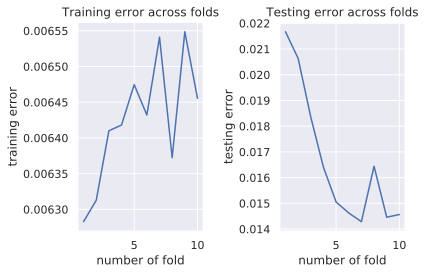

In [64]:
from sklearn.model_selection import validation_curve

kf = KFold(n_splits=10, random_state=None)
list_training_error = []
list_testing_error5 = []

for train_index, test_index in kf.split(X,y):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index] 
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]
  
  
  model = RandomForestRegressor()
  model.fit(X_train, y_train)
  y_train_data_pred = model.predict(X_train)
  y_test_data_pred = model.predict(X_test) 

  fold_training_error = mean_absolute_error(y_train, y_train_data_pred)        
  fold_testing_error = mean_absolute_error(y_test, y_test_data_pred)
  list_training_error.append(fold_training_error)
  list_testing_error5.append(fold_testing_error)

plt.subplot(1,2,1)
plt.plot(range(1, kf.get_n_splits() + 1), np.array(list_training_error).ravel())
plt.xlabel('number of fold')
plt.ylabel('training error')
plt.title('Training error across folds')
plt.tight_layout()

plt.subplot(1,2,2)
plt.plot(range(1, kf.get_n_splits() + 1), np.array(list_testing_error5).ravel())
plt.xlabel('number of fold')
plt.ylabel('testing error')
plt.title('Testing error across folds')
plt.tight_layout()
plt.show()

## **Statistical Testing**

In [0]:
from scipy.stats import friedmanchisquare

In [82]:
list_testing_error5
stat, p = friedmanchisquare(list_testing_error1,list_testing_error2,list_testing_error3,list_testing_error4, list_testing_error5)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=35.440, p=0.000
Different distributions (reject H0)
